In [2356]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.stattools import adfuller, acf
from statsmodels.graphics.tsaplots import pacf, plot_acf, plot_pacf
from statsmodels.tsa import stattools

In [2357]:
dataset = pd.read_csv('2.csv').head(85)

<AxesSubplot:>

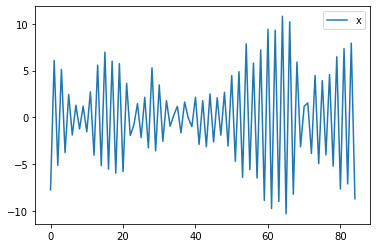

In [2358]:
dataset.plot(figsize=(6,4))

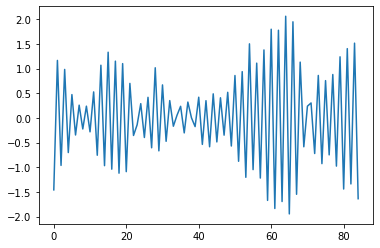

In [2359]:
X = dataset.x
n = len(X)
mu = dataset.mean()
S = dataset.var()
x_norm=np.zeros(n)
for i in range(n):
    x_norm[i] = (X[i] - mu)/ np.sqrt(S) 
plt.plot(x_norm)

In [2360]:
test = sm.tsa.adfuller(x_norm)
print('adf: ', test[0]) 
print('p-value: ', test[1]) 
print('Critical values: ', test[4]) 
if test[0]> test[4]['5%']: 
    print('есть единичные корни, ряд не стационарен') 
else:
    print('единичных корней нет, ряд стационарен') 

adf:  -5.636132830310275
p-value:  1.0620609914085213e-06
Critical values:  {'1%': -3.512738056978279, '5%': -2.8974898650628984, '10%': -2.585948732897085}
единичных корней нет, ряд стационарен


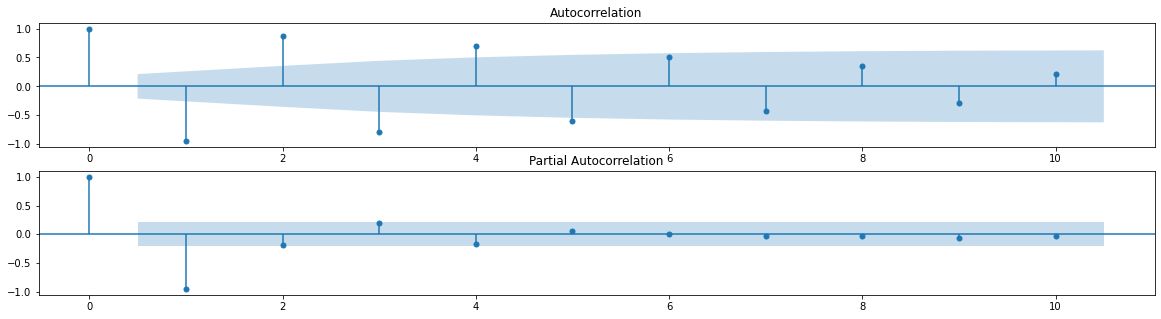

<Figure size 720x576 with 0 Axes>

In [2370]:
x_norm = - x_norm
fig = plt.figure(figsize= (20,5))
ig = plt.figure(figsize=(10,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(x_norm.squeeze(), lags=10, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(x_norm, lags=10, ax=ax2)

In [2362]:
p, q = 2 , 0

In [2363]:
def ts_arma(ts, p, q):
    model = ARMA(ts, order=(p,q)).fit()
    print(model.summary())

    return model, model.predict()

In [2364]:
model, result = ts_arma(x_norm, p=p, q=q)

C:\Program Files\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                   85
Model:                     ARMA(2, 0)   Log Likelihood                  14.620
Method:                       css-mle   S.D. of innovations              0.199
Date:                Fri, 25 Mar 2022   AIC                            -21.240
Time:                        10:58:07   BIC                            -11.469
Sample:                             0   HQIC                           -17.310
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0192      0.008      2.552      0.011       0.004       0.034
ar.L1.y       -1.4378      0.097    -14.871      0.000      -1.627      -1.248
ar.L2.y       -0.4651      0.098     -4.734      0.0

numpy.ndarray

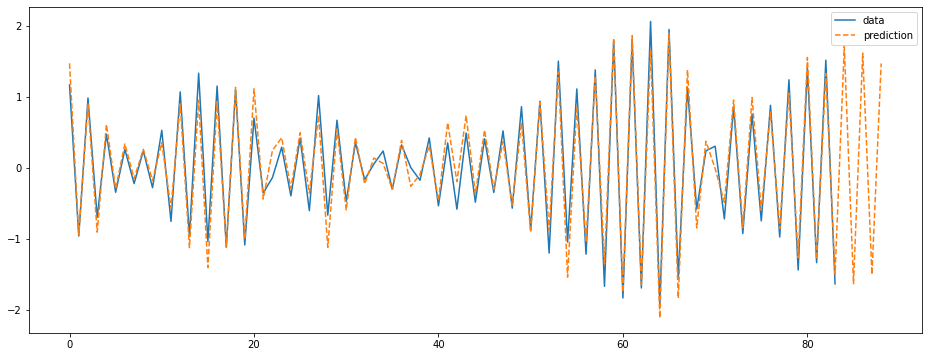

In [2365]:
pred_res = model.predict(86,89)
result = np.append(result, pred_res.T)
fig, ax = plt.subplots()
ax.plot(x_norm[1:], label = 'data')
ax.plot(result[1:], '--',label = 'prediction')
ax.legend()
fig.set_figwidth(16)
fig.set_figheight(6)
type(result)